<a href="https://colab.research.google.com/github/IlyaTyagin/AGATHA-C-GP/blob/master/HW5/HW5_Ilya_Tyagin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW5 Ilya Tyagin

Assignment itself described here: https://github.com/fedhere/MLTSA22_FBianco/tree/main/HW5

In [2]:
from sklearn import preprocessing

In [3]:
import pandas as pd
import pylab as pl
from tqdm import tqdm
import numpy as np

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [1]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

--2022-03-15 02:31:31--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel
Resolving api.worldbank.org (api.worldbank.org)... 52.188.136.184
Connecting to api.worldbank.org (api.worldbank.org)|52.188.136.184|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195584 (191K) [application/vnd.ms-excel]
Saving to: ‘SP.POP.TOTL?downloadformat=excel’

SP.POP.TOTL?downloa 100%[===================>] 191.00K   315KB/s    in 0.6s    

2022-03-15 02:31:34 (315 KB/s) - ‘SP.POP.TOTL?downloadformat=excel’ saved [195584/195584]



In [4]:
pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 4.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


## Reading dataset

In [6]:
pop_df = pd.read_excel(
    'SP.POP.TOTL?downloadformat=excel', 
    skiprows=3, 
    header=0,
    usecols=[0] + list(range(4,100))
    ).set_index('Country Name')

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [7]:
pop_df.shape

(266, 61)

In [8]:
pop_df_clean = (
    pop_df
      .dropna(axis=1,how='all')
      .dropna(axis=0,how='any')
      )

In [9]:
pop_df_clean.T

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,54208.0,130836765.0,8996967.0,96396419.0,5454938.0,1608800.0,13410.0,92197715.0,92417.0,20481781.0,...,32500.0,32670048.0,63689.0,3.032156e+09,108627.0,947000.0,5315351.0,17099836.0,3070780.0,3776679.0
1961,55434.0,134159786.0,9169406.0,98407221.0,5531451.0,1659800.0,14378.0,94724540.0,100801.0,20817270.0,...,34300.0,33666111.0,65700.0,3.071596e+09,112112.0,966000.0,5393034.0,17524533.0,3164330.0,3905038.0
1962,56234.0,137614644.0,9351442.0,100506960.0,5608499.0,1711319.0,15379.0,97334438.0,112112.0,21153042.0,...,35000.0,34683410.0,67793.0,3.124561e+09,115768.0,994000.0,5473671.0,17965733.0,3260645.0,4039209.0
1963,56699.0,141202036.0,9543200.0,102691339.0,5679409.0,1762621.0,16407.0,100034191.0,125130.0,21488916.0,...,39800.0,35721213.0,69944.0,3.189656e+09,119552.0,1022000.0,5556767.0,18423157.0,3360099.0,4178726.0
1964,57029.0,144920186.0,9744772.0,104953470.0,5734995.0,1814135.0,17466.0,102832792.0,138049.0,21824427.0,...,40800.0,36780001.0,72116.0,3.255146e+09,123346.0,1050000.0,5641598.0,18896303.0,3463211.0,4322854.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,104865.0,609978946.0,35383028.0,412551299.0,28842482.0,2876101.0,77295.0,404042892.0,9360975.0,43590368.0,...,107516.0,93640435.0,278326.0,7.433569e+09,194540.0,1777557.0,27168210.0,56207649.0,16363449.0,14030338.0
2017,105361.0,626392880.0,36296111.0,423769930.0,29816769.0,2873457.0,76997.0,411942825.0,9487206.0,44044811.0,...,107281.0,94600643.0,285499.0,7.519183e+09,195358.0,1791003.0,27834811.0,57009751.0,16853608.0,14236599.0
2018,105846.0,643090131.0,37171922.0,435229381.0,30809787.0,2866376.0,77008.0,419851989.0,9630966.0,44494502.0,...,107001.0,95545959.0,292675.0,7.602454e+09,196128.0,1797085.0,28498683.0,57792520.0,17351714.0,14438812.0
2019,106310.0,660046272.0,38041757.0,446911598.0,31825299.0,2854191.0,77146.0,427870273.0,9770526.0,44938712.0,...,106669.0,96462108.0,299882.0,7.683372e+09,197093.0,1788878.0,29161922.0,58558267.0,17861034.0,14645473.0


Text(0, 0.5, 'pop')

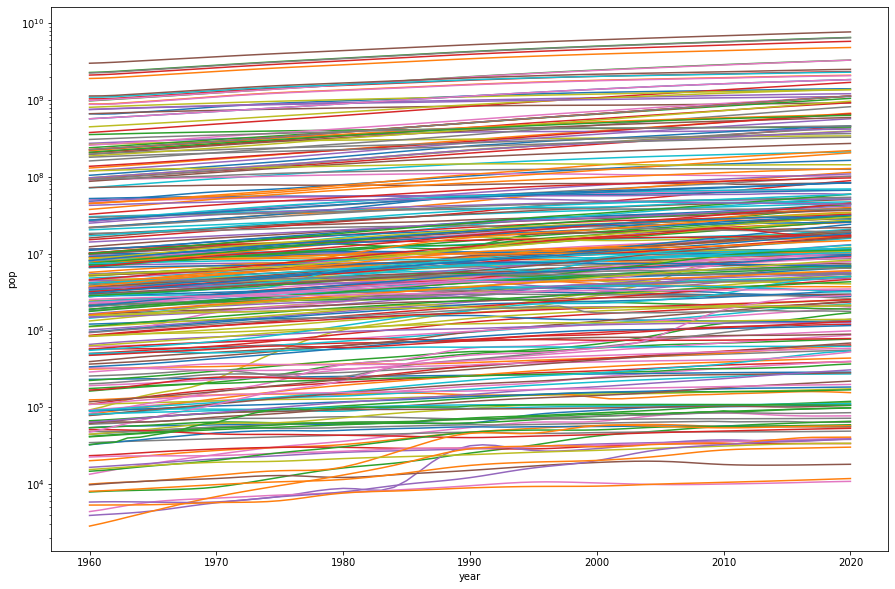

In [10]:
pop_df_clean.T.plot(
    legend=False,
    logy=True,
)
pl.xlabel('year')
pl.ylabel('pop')

Plot: Population over time, all 262 countries, log scale.
This plot doesn't show much, so we need to scale population values to show temporal trends.

In [11]:
X = preprocessing.scale(pop_df_clean, axis=1)
X.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


(262, 61)

In [12]:
X.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Text(0, 0.5, 'population, scaled')

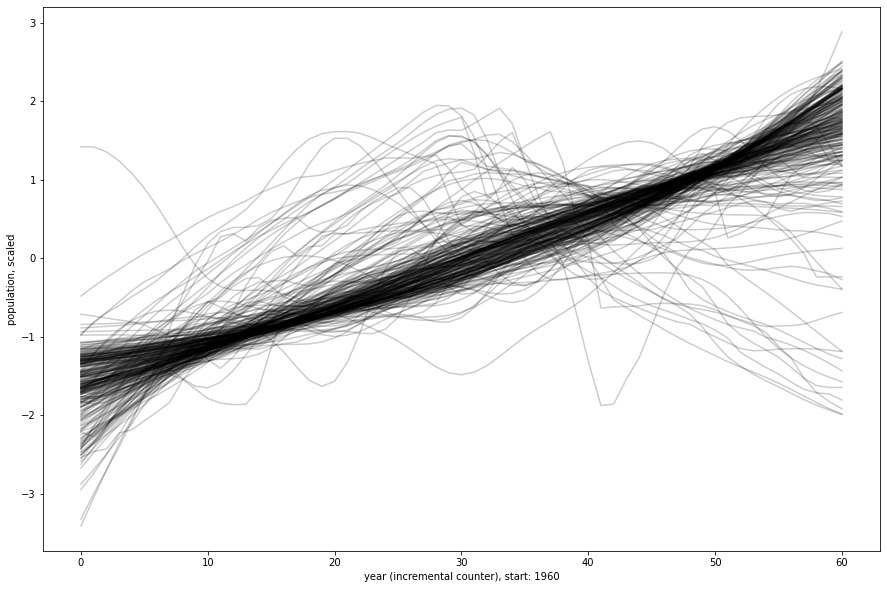

In [15]:
pl.plot(X.T, 'k', alpha=0.2);
pl.xlabel('year (incremental counter), start: 1960')
pl.ylabel('population, scaled')

Plot: Scaled population over time.
Now we can see that for the majority of countries population grows, but there's also a significant number of outliers.

## Clustering

In [22]:
from sklearn import cluster
from collections import Counter

In [17]:
c = cluster.k_means(X, 4)

4 clusters were chosen as a value we used in class.
As we can see later, it's an optimal value, which we can obtain with an elbow plot of intracluster variances.

### What clusters are the smallest?

In [32]:
for cluster_idx, n_countries in Counter(c[1]).most_common()[-2:]:
  print(f'Cluster #{cluster_idx}, size={n_countries}')
  print(
      '\n'.join(
          ['\t' + country for country in 
            (pop_df_clean
            .iloc[c[1]==cluster_idx]
            .index
            )
          ]
      )
  )

Cluster #0, size=26
	Albania
	Armenia
	Belarus
	Central Europe and the Baltics
	Cuba
	Curacao
	Czech Republic
	Dominica
	Faroe Islands
	Greenland
	Guyana
	Japan
	Kazakhstan
	Moldova
	North Macedonia
	Montenegro
	Poland
	Puerto Rico
	Russian Federation
	Serbia
	Slovak Republic
	Slovenia
	Tonga
	St. Vincent and the Grenadines
	Virgin Islands (U.S.)
	Kosovo
Cluster #2, size=10
	Bulgaria
	Bosnia and Herzegovina
	Estonia
	Georgia
	Croatia
	Hungary
	Lithuania
	Latvia
	Romania
	Ukraine


Cluster 0:

Countries where population was growing but then stabilized at some level. The majority of the countries are relatively developed (some are developing), but the population stays the same for different reasons.

For example, in Japan it's the overall population aging and significant urbanization, but for some other countries it can be related to migration. 

Cluster 2:

Countries where population was growing until Soviet Union disappeared. Then it started descreasing, supposedly related to migration and poor economical stability.

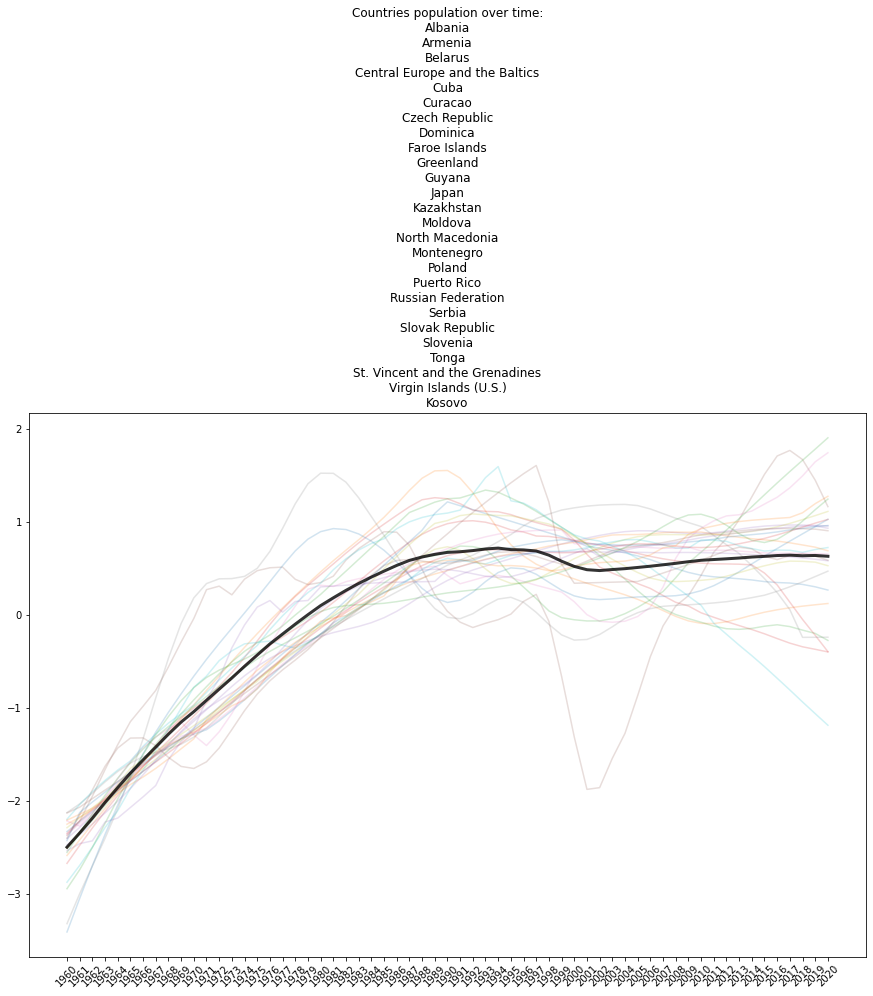

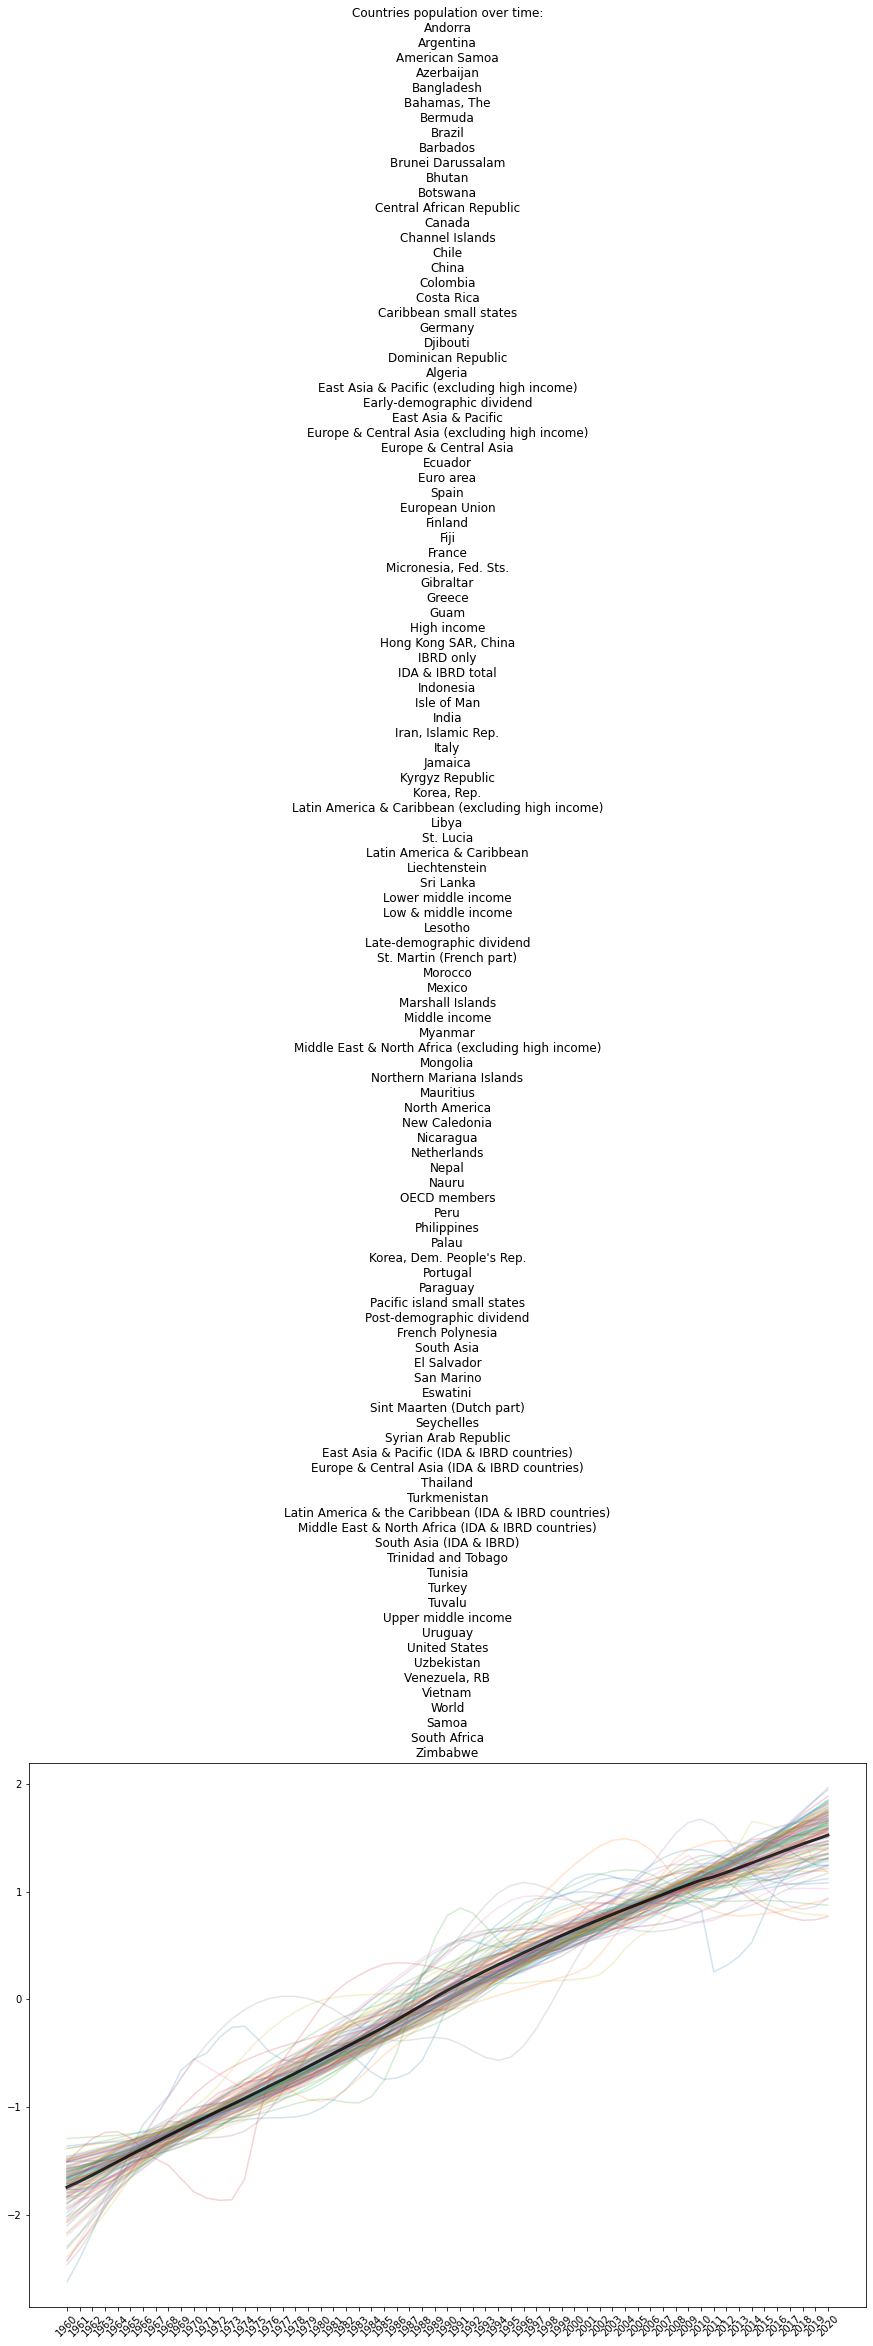

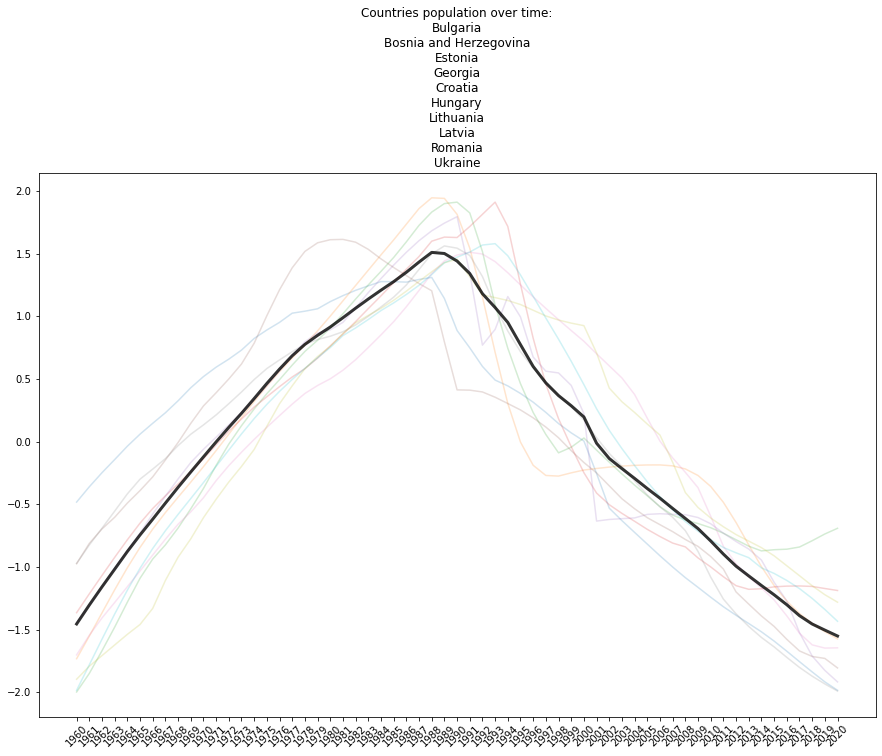

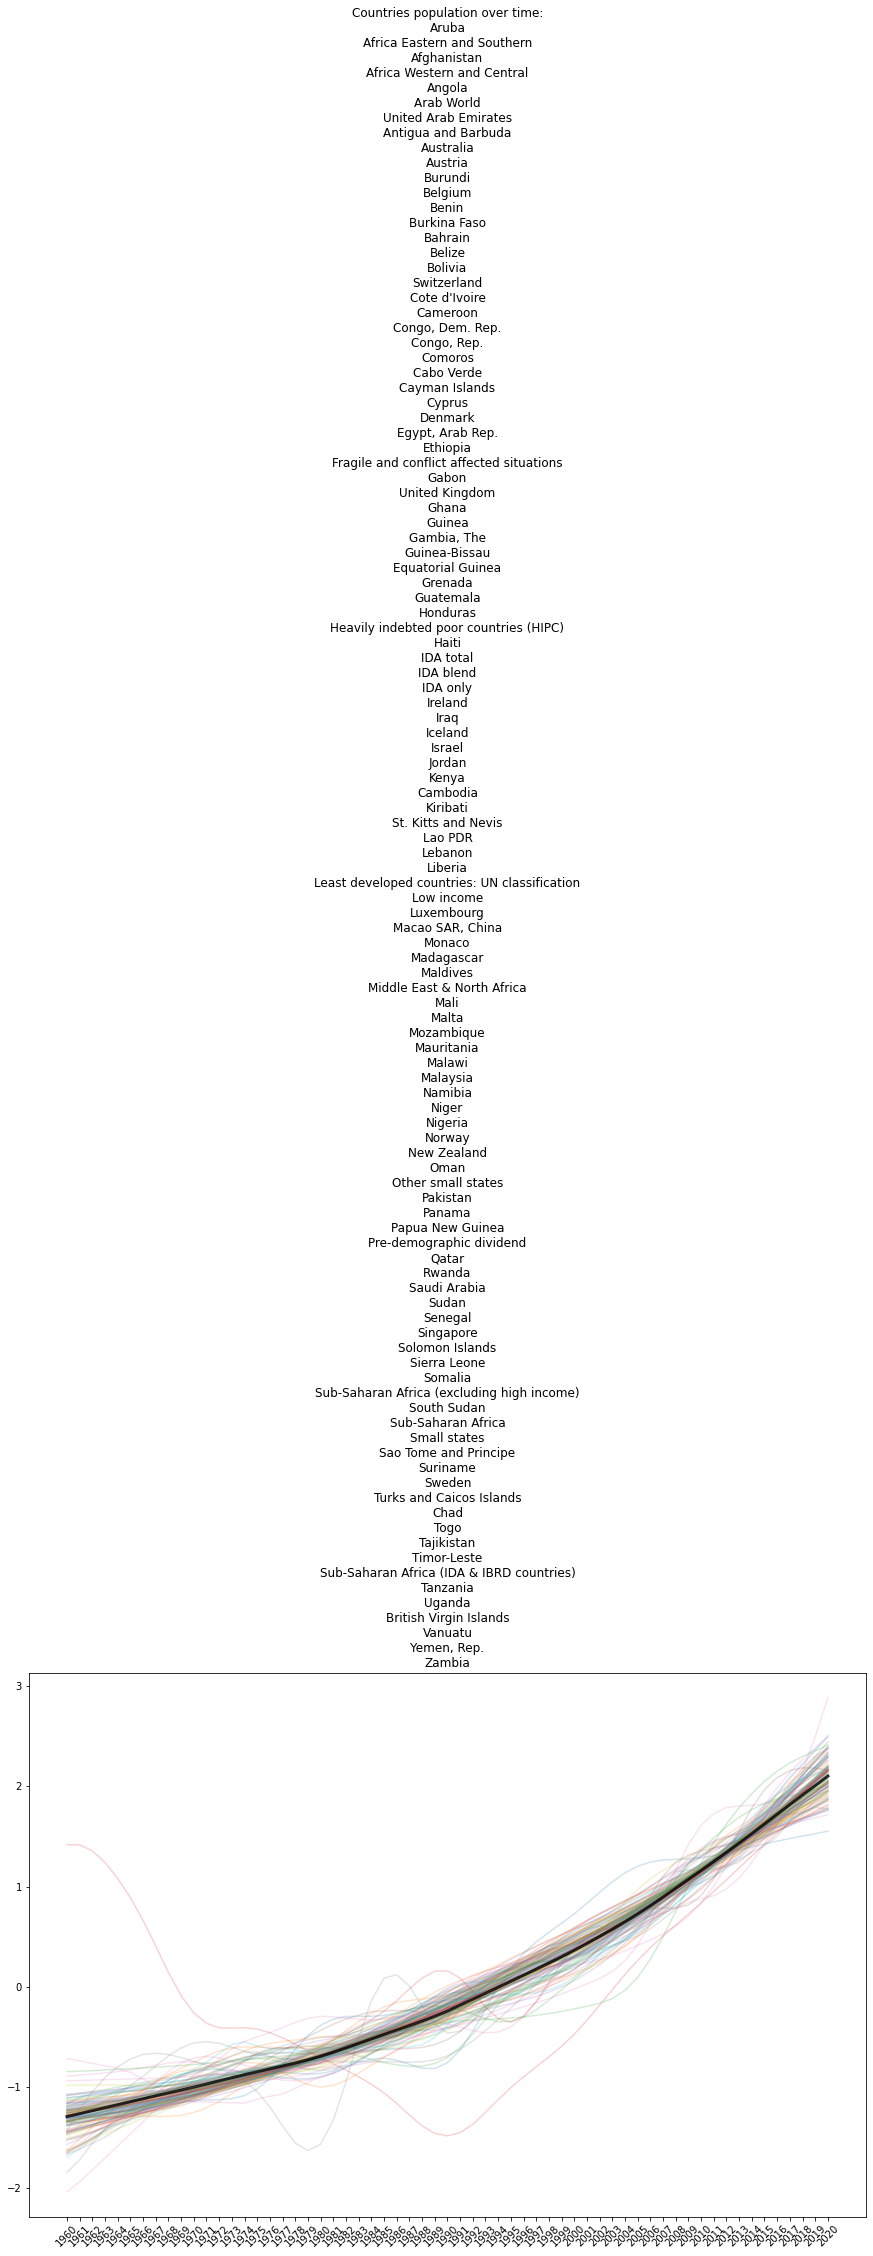

In [33]:
for cluster_idx in sorted(list(set(c[1]))):
  pl.plot(
    pop_df_clean.columns,
    X[c[1]==cluster_idx].T,
    #'k',
    alpha=0.2
  )
  pl.plot(
    c[0][cluster_idx],
    'k',
    alpha=0.8,
    linewidth=3
  )
  pl.xticks(rotation=45)
  pl.title('Countries population over time:\n' + '\n'.join(pop_df_clean.iloc[c[1]==cluster_idx].index))
  pl.show()

Plots: Countries population over time, clustered.
Colors represent different countries, bold black line is a cluster centroid.

## Intracluster variance

In [35]:
N = list(range(2,11))
N

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [44]:
clusterings = []
intracluster_var = dict()
for n_cl in tqdm(N):
  c = cluster.k_means(X, n_cl)
  clusterings.append(c)
  J = []
  for cluster_idx, _ in enumerate(c[0]):
    cluster_records = X[c[1]==cluster_idx]
    centroid_coord = c[0][cluster_idx]
    curr_var = 0
    for record in cluster_records:
      curr_var += np.linalg.norm(
          centroid_coord - record, 
          ord=2
          )
    J.append(curr_var)
  intracluster_var[n_cl] = sum(J)

100%|██████████| 9/9 [00:01<00:00,  6.23it/s]


In [45]:
centroid_coord.shape

(61,)

In [46]:
intracluster_var

{2: 450.73239277204465,
 3: 365.0149821183843,
 4: 306.5742787407515,
 5: 284.6331455706217,
 6: 277.2479513168241,
 7: 266.3689190229955,
 8: 245.66742594588754,
 9: 237.43394834571743,
 10: 228.29177573821963}

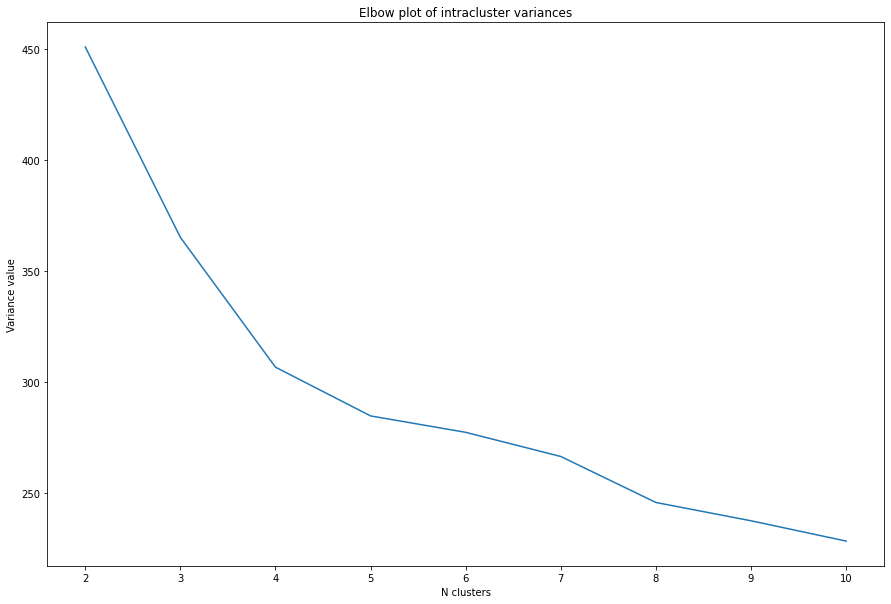

In [47]:
pl.plot(
    list(intracluster_var.keys()),
    list(intracluster_var.values())
)
pl.title('Elbow plot of intracluster variances')
pl.xlabel('N clusters')
pl.ylabel('Variance value');

Plot: Elbow plot of intracluster variances. We can see that the first "elbow" is located at 4 clusters, the second one is supposedly on 8 clusters level. This figure is sensitive to random initialization, the last time I plotted it I observed only one elbow at 4 clusters, so I'd say it's an optimal value for this dataset.